# **Linear Regression with Python Scikit Learn**

We will use Python Scikit-Learn library for machine learning to implement simple regression involving two variables

In this simple linear regression, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Reading data from remote link
url = "http://bit.ly/w-data"
scl_data = pd.read_csv(url)

In [3]:
#Display first five row of DataFrame
scl_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Data_structure**

In [4]:
# Display summary information about the DataFrame
scl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Data Structure Insights**

As observed, the DataFrame consists of two variables: **Hours** and **Scores**. With a total of 25 records means smaller dataset, it's noteworthy that there are no missing values within the dataset

## **Exploratory Data Analysis**


**Descriptive Analysis**

Let's perform descriptive analysis on dataset using Describe function which will calculate mean, median, st dev, range and percentiles of both variables

In [5]:
# Generate descriptive statistics for the DataFrame
scl_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Descriptive Analysis Insights**

the summary statistics suggest that the dataset includes a range of study hours and corresponding scores. The majority of individuals studied between 2.7 and 7.4 hours, with scores ranging from 17.0% to 95.0%. There is variability in both study hours and scores, as indicated by the standard deviation values. We will perform Further analysis, such as visualization and correlation analysis, for additional insights into the relationship between study hours and scores.

### **Visualiation analysis**


As we performed descriptive analysis above. Let's explore dataset through visualization to understand **relationship** between variables, **distribution** of variables individually, **distribution+outliers** in dataset using **scatter plot, histogram, box plot and joint plot** respectively  

### **Scatter plot**
Let's plot our data points on 2-D graph to eyeball our dataset and see if we manually find any relationship between the variables.

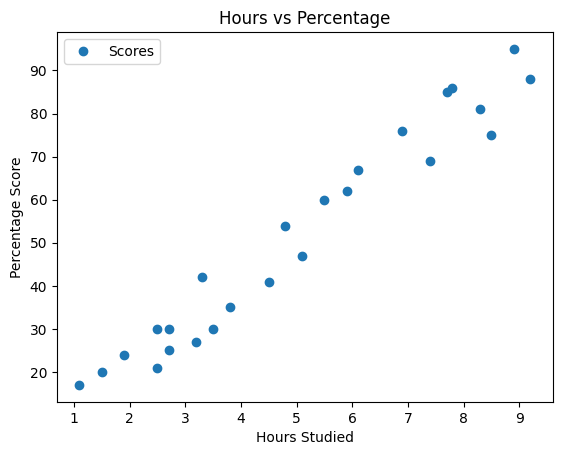

In [6]:
#Plotting the scatter plot for both variables
scl_data.plot(x= 'Hours', y= 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show();

**Insights from Scatter Plot**


In the scatter plot depicting above hours studied (x-axis) against scores achieved (y-axis), we observe a positive direction of the relationship, indicating that as the number of hours studied increases, the scores achieved also tend to increase. The data points are tightly clustered around a trend line, suggesting a strong relationship between the two variables. Furthermore, there are no discernible outliers, and the pattern of a linear relationship is evident, reinforcing the robustness of the correlation between hours studied and scores achieved.

### **Histogram**

let's plot histogram of both variable to understand frequency distribution

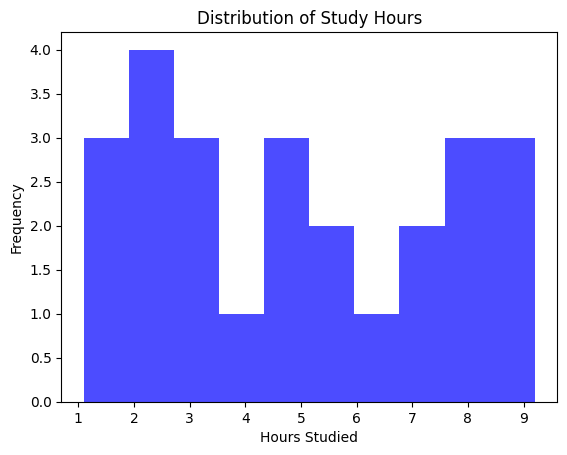

In [7]:
#Plotting histogram of study hours variable
plt.hist(scl_data['Hours'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Study Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show();

**Insights on Hours Variable**

----->It appears that the distribution is not symmetrically distributed around a central value. Instead, it exhibits a peak followed by gradual smaller frequencies which indicate of positive/right skewed. this suggests that fewer students studied from longer hours and much more student studied for lesser hours

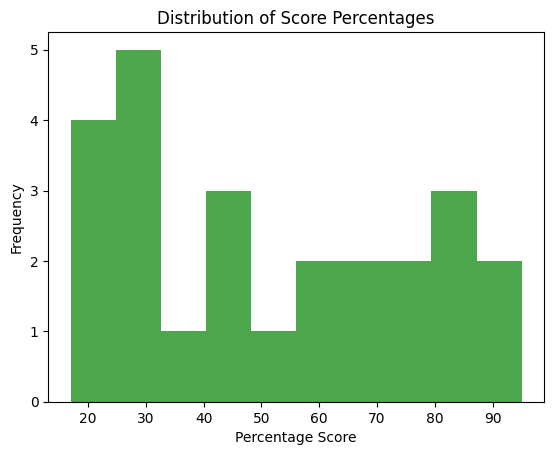

In [8]:
#Plotting histogram of Scores variable
plt.hist(scl_data['Scores'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of Score Percentages')
plt.xlabel('Percentage Score')
plt.ylabel('Frequency')
plt.show()

**Insights on Score Variable**

----> the distribution displays a concentration of occurrences at lower scores, followed by irregular dips and moderate increases in frequency towards higher scores. This pattern is also indicate right skewed, as there are more students with lesser or moderate score than the higher score







### **Box Plot**

Let's plot box plot to get insight of distribution and potential outlier in score

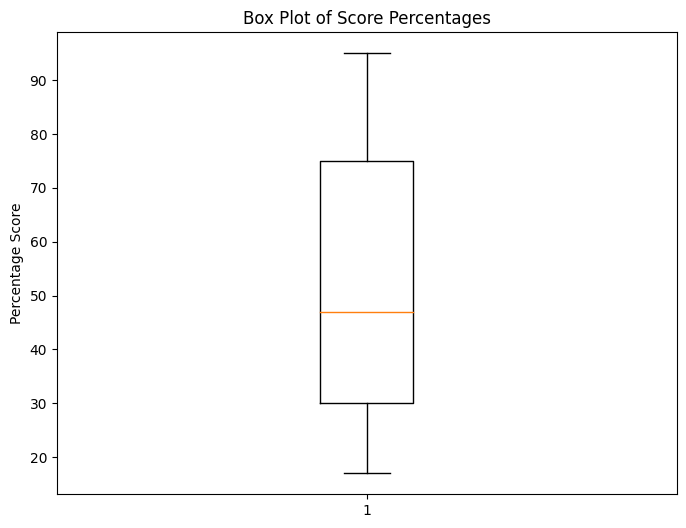

In [9]:
#Plotting Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(scl_data['Scores'])
plt.title('Box Plot of Score Percentages')
plt.ylabel('Percentage Score')
plt.show();

**Insights from Box Plot**

----->the box plot serves as a visual representation of key descriptive statistics such as median, percentiles and range of the dataset. its main purpose is to provide a visual insight into the presence of outlier data points. upon examination, it is  evident that outlier data points are not observed within the dataset

**Joint Plot**

We have already plotted scatter plot and Histogram to understand relationship and distribution of both variables. Let's plot joint plot to visualize relationship and distribution together for getting further insights

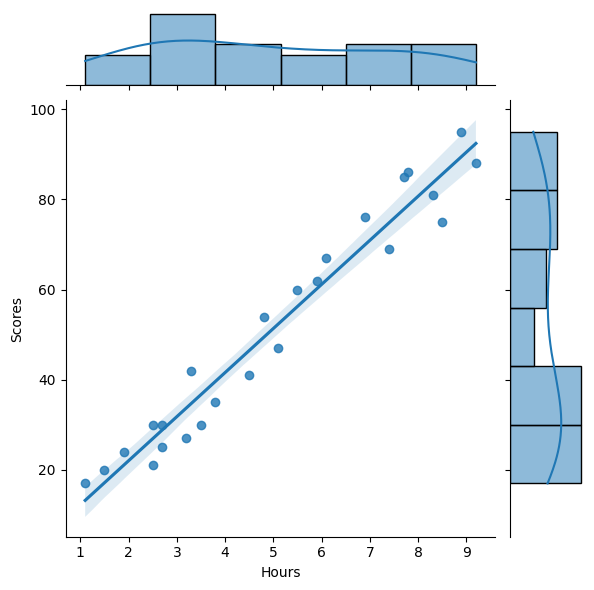

In [10]:
#Plotting joint plot
sns.jointplot(x='Hours', y='Scores', data=scl_data, kind='reg')
plt.show();


**Insights from Joint Plot**

The joint plot depicts a positive direction of the relationship between hours studied and scores achieved, indicating that as the number of hours studied increases, the scores achieved also tend to increase. This observation is reinforced by the tight clustering of data points around a trend line, suggesting a strong and linear relationships between the two variables. Also the distribution of the data points across different score ranges

# **Data Prepration**

After Visual analysis. Let's prepare data and dividing the data into "attributes" and "labels"

In [11]:
#Assigning Variables to feature and target
X = scl_data.iloc[:, :-1].values
y = scl_data.iloc[:, 1].values

**Splitting the data into training and test sets using scikit-learn's built-in train_test_split() method**

In [12]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Training the Algorithm**

We have splited our data into training and testing sets. Firstly, we train algorithm on training data

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training Complete")

Training Complete


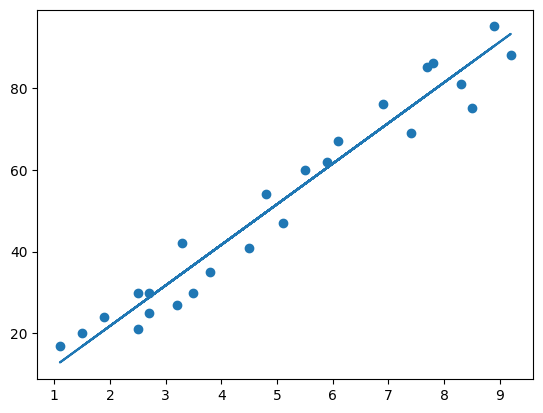

In [14]:
#Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

#Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show();

### **Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions

In [15]:
#Testing data - In Hours
print(X_test)

#Predicting the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
#We can use our own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print('No of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm on a particular dataset. We use mean square error to evaluate the performance of regression.

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


**Lower MSE indicates that predicted values are closer to the actual values**